In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Função de tratamento de dataset

def tratamento(df):
    df.drop(['Wearing Masks', 'Sanitization from Market'], axis=1, inplace=True);

    df.replace('Yes', 1, inplace=True);
    df.replace('No', 0, inplace=True);
    return df;

In [3]:
# Carregando o dataset

df = pd.read_csv("dataset.csv");
df.shape

(5434, 21)

In [4]:
#Visualização e percepções de dados
#Análise univariada
#Análise bivariada / multivariada
#Pivot
#Possíveis ajustes e tratamento dos dados
#Feature engineering
#Verificações de suposição do(s) modelo(s) de Aprendizado de
#Máquina
#Preparação de dados para o(s) modelo(s)

In [4]:
df.head(2)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes


Podemos usar os métodos `.info()`, `.value_counts()` e `.describe()` para obter informações básicas sobre quantidade presente dos dados, tipos e valores deles.

In [5]:
df = tratamento(df);

In [6]:
df.describe()


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,0.490063,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,0.499947,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


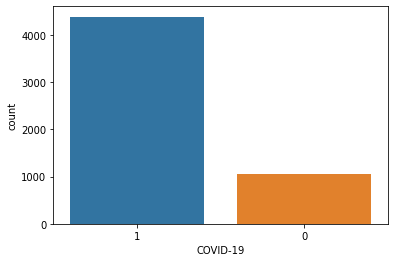

In [26]:
#Observa-se que o dataset está desbalanceado

risk_plot = sns.countplot(data=df, x='COVID-19', order=df['COVID-19'].value_counts().index)
plt.show()

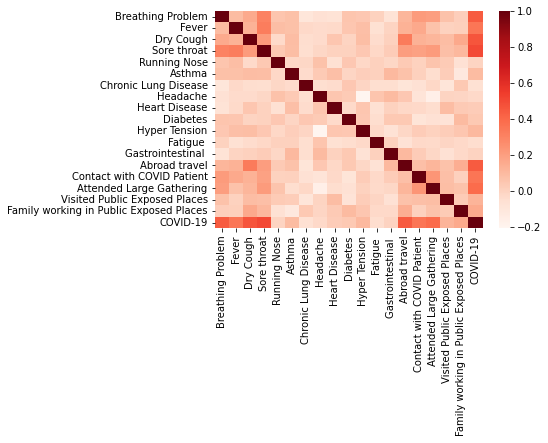

In [8]:
#df.corr().style.background_gradient(cmap='coolwarm', axis=None)
sns.heatmap(df.corr(), cmap="Reds")
plt.show()

In [9]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [18]:
correlation = abs(df[df.columns[:]].corr())['COVID-19'][:].sort_values(ascending=False)


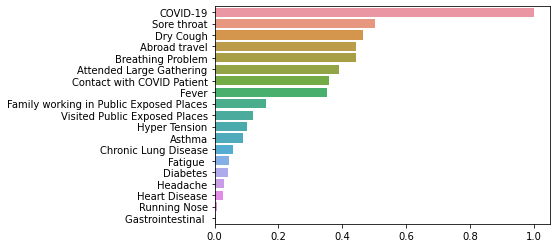

In [19]:
sns.barplot( x=correlation.values, y=correlation.index)
plt.show()

In [36]:

features = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places']

target = ['COVID-19']

X = df[features]
y = df[target]

In [32]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

y.value_counts()

COVID-19
0           4383
1           4383
dtype: int64

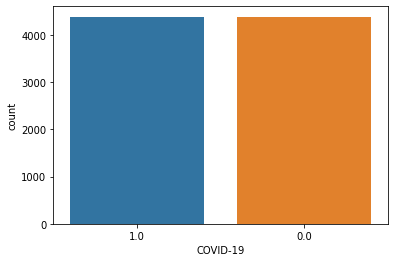

In [35]:
df = pd.concat([X, y]);
sns.countplot(data=df, x='COVID-19', order=df['COVID-19'].value_counts().index)
plt.show()

## Criação do modelo

Para conseguir avaliar o desempenho do nosso modelo, vamos dividir os dados que temos entre dados de treino e de teste, e assim, após o treinamento, verificar como ele está se saindo com as predições.

In [38]:
from sklearn.linear_model import LogisticRegression
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import cross_val_score

In [39]:
split = train_valid_test_split(df, target = target, train_size=0.8,
                                        valid_size=0.1, test_size=0.1)
                                        
X_train, y_train, X_valid, y_valid, X_test, y_test = split

In [7]:
lr = LogisticRegression(solver='liblinear')
scores = cross_val_score(lr, x, y, cv=10, scoring='accuracy')
print('Acurácia média:', scores.mean())

In [11]:
clean_df.columns.size
#print(clean_df.columns);

#Analisando a correlação entre cada coluna e a coluna objetivo para a escolha de parâmetros:
abs(clean_df[clean_df.columns[:]].corr())['CHURN'][:].sort_values(ascending=False)

CHURN               1.000000
CONTRACT            0.398171
TENURE              0.358111
INTERNETSERVICE     0.314863
ONLINESECURITY      0.284204
TECHSUPPORT         0.284006
PAYMENTMETHOD       0.282370
ONLINEBACKUP        0.265068
DEVICEPROTECTION    0.259771
STREAMINGMOVIES     0.223920
STREAMINGTV         0.223664
PAPERLESSBILLING    0.203243
TOTALCHARGES        0.203189
DEPENDENTS          0.162725
SENIORCITIZEN       0.152072
PARTNER             0.149045
MONTHLYCHARGES      0.096750
GENDER              0.022519
PHONESERVICE        0.009270
ID                  0.008961
MULTIPLELINES       0.000023
Name: CHURN, dtype: float64

Foram escolhidos como parâmetros colunas com correlação maior que 0.02 para com a variável objetivo.


In [12]:
features = ['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES']

target = ['CHURN']

X = clean_df[features]
y = clean_df[target]

CHURN
1        3029
0        3029
dtype: int64

O SMOTE foi a alternativa usada para lidar com o desbalanceamento

In [13]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

y.value_counts()

CHURN
1        3029
0        3029
dtype: int64

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [14]:
test_pct = 0.2 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct)

model = RandomForestClassifier(n_estimators=999)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test);
acc = f1_score(y_test, y_pred);
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.8548770816812055


In [15]:
dfa = pd.read_csv("ANSWER.csv");

dfa = tratamento(dfa);

answer = model.predict(dfa[features]);

In [16]:
answer = pd.DataFrame(answer, columns =['CHURN']);
answer.replace(0, 'No', inplace=True);
answer.replace(1, 'Yes', inplace=True);

answer.to_csv('ANSWER.csv',index=False);

In [17]:
answer.value_counts()

CHURN
No       939
Yes      385
dtype: int64